<a href="https://colab.research.google.com/github/bayanbayrakdar/introduction-image-processong-and-computer-vision/blob/main/pixel_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pixel Transformation**:

**HISTOGRAM**:
count number of occurrences of a pixel or intensity values

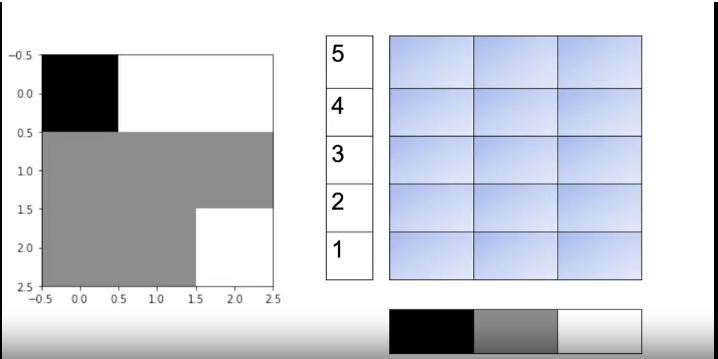

In [11]:
import cv2
from matplotlib import pyplot as plt
pic=cv2.imread("lenna.png")
# [0] chanal we need calculate
hist=cv2.calcHist([pic],[0],None,[256],[0,256])


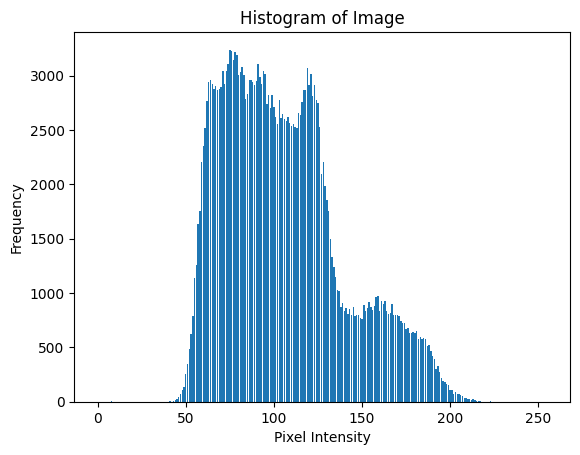

In [12]:

pic=cv2.imread("lenna.png")
# [0] chanal we need calculate
hist=cv2.calcHist([pic],[0],None,[256],[0,256])
plt.bar(range(256), hist.ravel())
plt.title('Histogram of Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


**Intensity Transformation**
changes a image on pixel at a time , some image tersformation depend on neighbouring pixels
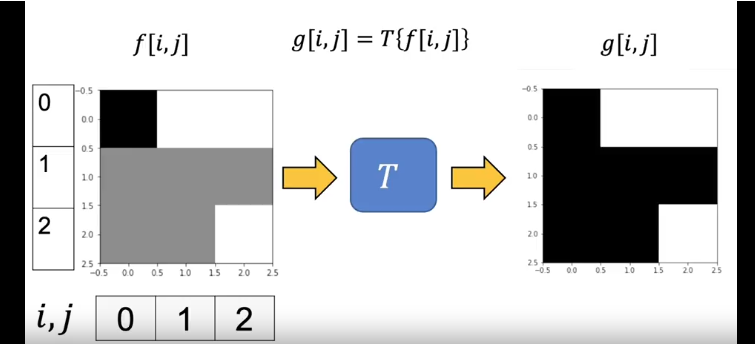


if we plot the histogram after applying the transform , we see the histogram is shifted is shifted and scaled

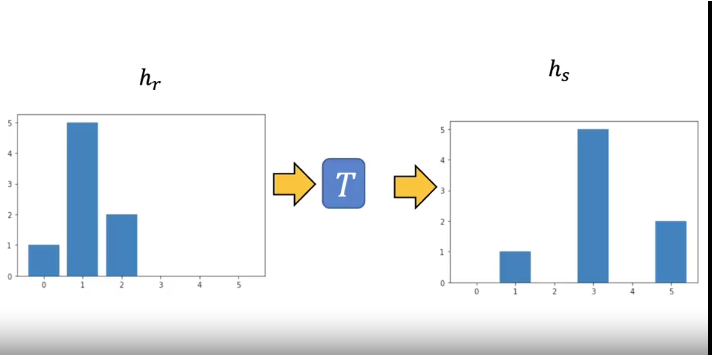


**Image Negative**
the reverse the intensity levels of an image


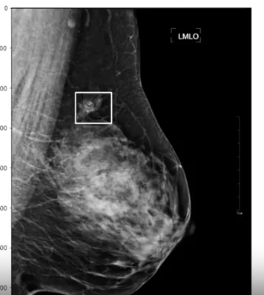

**consider the following image , its difficult to make out details
we will reverse the intensity levels of the image
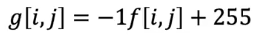

after this transform
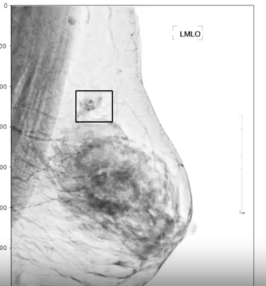


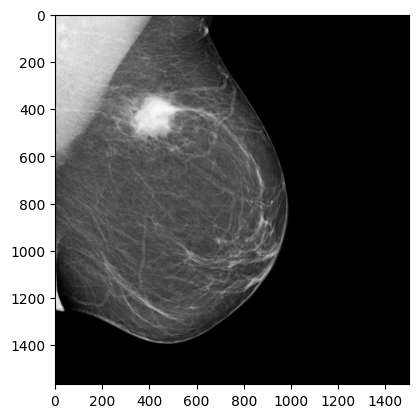

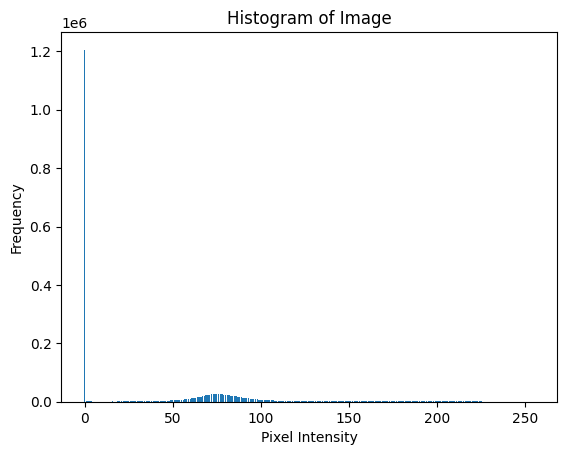

In [18]:
image_mammogram=cv2.imread('mammogram.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image_mammogram,cmap='gray')
plt.show()

hist=cv2.calcHist([image_mammogram],[0],None,[256],[0,256])
plt.bar(range(256), hist.ravel())
plt.title('Histogram of Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


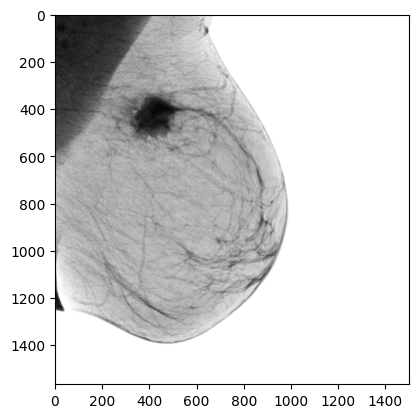

In [23]:
img_neg=-1 * image_mammogram +255
plt.imshow(img_neg,cmap='gray')
plt.show()

# hist=cv2.calcHist([img_neg],[0],None,[256],[0,256])
# plt.bar(range(256), hist.ravel())
# plt.title('Histogram of Image')
# plt.xlabel('Pixel Intensity')
# plt.ylabel('Frequency')
# plt.show()

**Brightness and Contrast Adjustments**


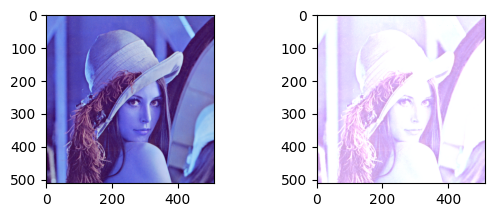

In [32]:
alpha=1 # simple contrast control
beta=150 #simple brightness control
image=cv2.imread('lenna.png')
new_image=cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(new_image,cmap='gray')
plt.show()

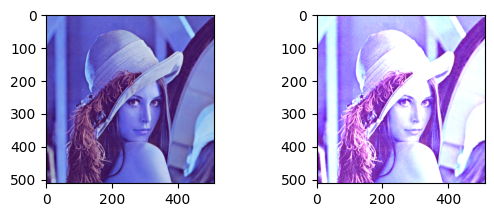

In [37]:
alpha=2 # simple contrast control
beta=0 #simple brightness control
image=cv2.imread('lenna.png')
new_image=cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(new_image,cmap='gray')
plt.show()

**Histogram Equalization**
is an alogrith that uses the image's Histogram to adjust contrast
cv2.equalizeHist(image)
apply on trainsformation to adjust histogram to contrast image

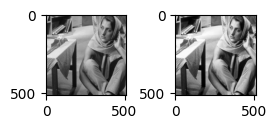

<BarContainer object of 256 artists>

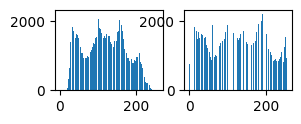

In [43]:
bar=cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)
new_image=cv2.equalizeHist(bar)
plt.subplot(4,4,1)
plt.imshow(bar,cmap='gray')
plt.subplot(4,4,2)
plt.imshow(new_image,cmap='gray')
plt.show()
plt.subplot(4,4,3)
hist=cv2.calcHist([bar],[0],None,[256],[0,256])
plt.bar(range(256), hist.ravel())

plt.subplot(4,4,4)
hist=cv2.calcHist([new_image],[0],None,[256],[0,256])
plt.bar(range(256), hist.ravel())



**Thresholding and simple segmentation**

threshold for each pixel , it can used in extracting from an image this is called segementation

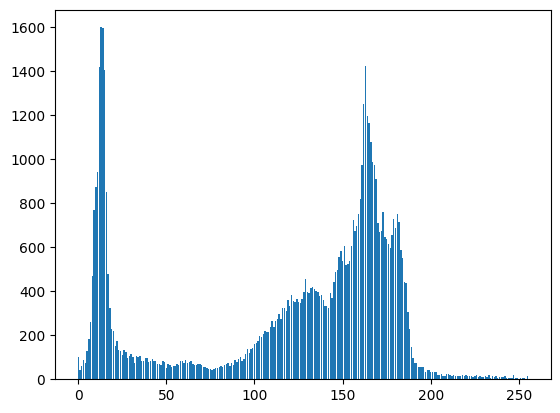

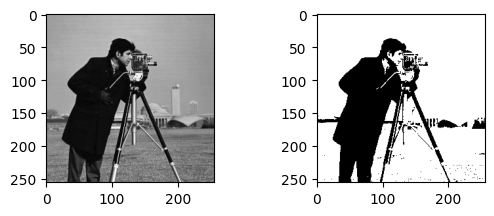

In [55]:
## manual threshold
import numpy as np
image =cv2.imread('cameraman.jpg',cv2.IMREAD_GRAYSCALE)
def thresholding(image,threshold,max_value):
    (M,N)=image.shape
    new_image=np.zeros((M,N))
    for i in range(M):
      for j in range(N):
        if image[i,j]>threshold:
          new_image[i,j]=max_value
        else:
          new_image[i,j]=0
    return new_image
hist=cv2.calcHist([image],[0],None,[256],[0,256])
plt.bar(range(256), hist.ravel())
plt.show()
new_image=thresholding(image,80,255)
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(new_image,cmap='gray')
plt.show()

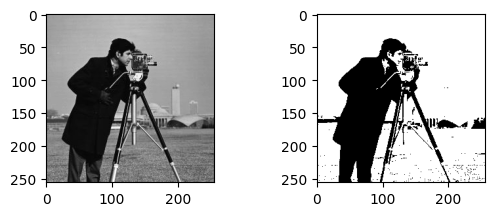

88.0

In [60]:
# otsu thresholding
ret,otsu=cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(otsu,cmap='gray')
plt.show()
ret